# Animated Map of COVID-19 Data - United States

In [8]:
#install.packages("ggrepel", repos='http://cran.us.r-project.org')

In [7]:
library(readr) #load dataset
library(dplyr) #tidy data
library(tidyr) #merge data
library(stringr) #deal with strings
#graph
library(ggplot2)
library(gganimate) #animation
library(ggthemes) #change the theme
library(ggmap) #plot map
library(ggrepel) #add text label
library(maps) #map data

## Load Data

In [10]:
#load states data
data_covid_state<-read_csv("covid19_state.csv")

Parsed with column specification:
cols(
  date = col_date(format = ""),
  state = col_character(),
  fips = col_character(),
  cases = col_double(),
  deaths = col_double()
)


## Clean/Tidy Data

In [11]:
#change state to lowercase
data_covid_state$state<-str_to_lower(data_covid_state$state)

In [12]:
#join usa map with states data
data_covid_map<-left_join(usa_map, data_covid_state, by="state")

## Create Map

In [13]:
p<-ggplot()

In [14]:
#map layer
p<-p+geom_polygon(data=filter(data_covid_map, date=="2020-3-20"), aes(x=long, y=lat, group=group, fill=cases), color="grey90", size=0.1)+coord_fixed(1.3)

In [15]:
#text layer
p<-p+geom_text(data=state_geocode, aes(x=longitude, y=latitude, label=state ), size=2, color="paleturquoise4")

In [16]:
#color gradient
p<-p+scale_fill_gradient(low="white", high="red")

In [17]:
#change the color
p<-p+theme_wsj(base_size=5, color="grey")

In [18]:
#fine tune
p<-p+labs(title="COVID-19", subtitle="Date: 2020/3/20")

In [19]:
#remove x and y labels, not needed here
p<-p+theme(axis.title.x = element_blank(), axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.title.y = element_blank(), axis.text.y = element_blank(), axis.ticks.y = element_blank())

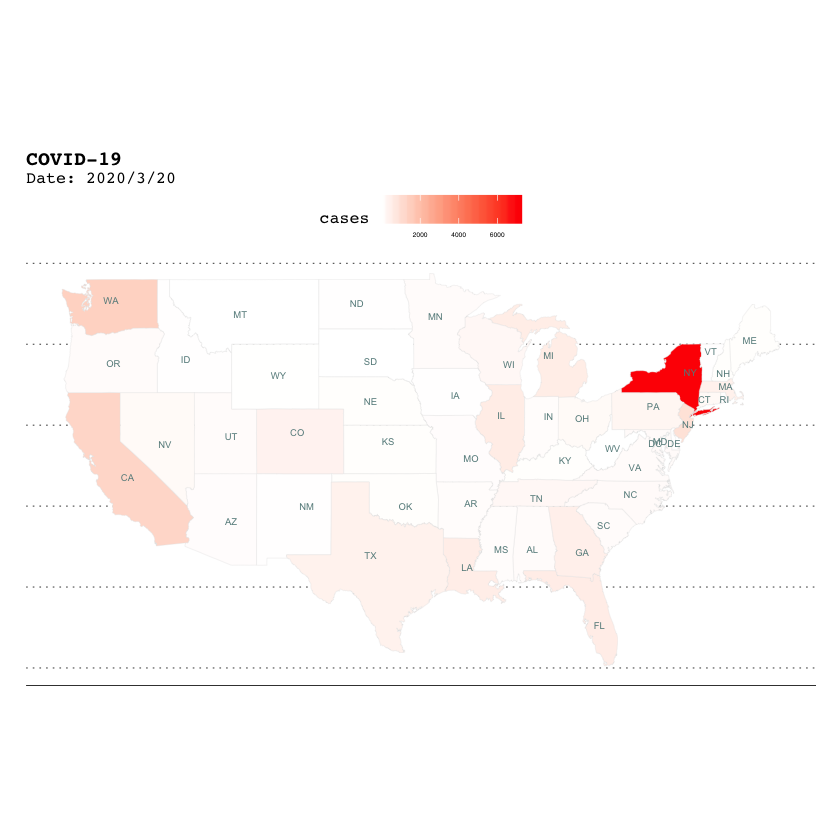

In [20]:
print(p)

## Map Data and Animation

In [21]:
#load covid data
data_covid_county<-read_csv("covid19_county.csv") #covid19
data_county_loc<-read_csv("data_county.csv")  #county geocode data

Parsed with column specification:
cols(
  date = col_date(format = ""),
  county = col_character(),
  state = col_character(),
  fips = col_character(),
  cases = col_double(),
  deaths = col_double()
)
Parsed with column specification:
cols(
  county = col_character(),
  lon = col_double(),
  lat = col_double()
)


In [22]:
#map layer
p<-ggplot()+borders("state", colour="white", fill="gray90")+theme_wsj(base_size = 8, color="grey")

In [23]:
#scatterplot layer
data_covid_map<-left_join(data_covid_county, data_county_loc, by="county")
#scatterplot
p<-p+geom_point(data=data_covid_map, aes(x=lon, y=lat, size=cases), color="indianred3", alpha=0.5)+xlim(-125,-70)+ylim(25, 50)

In [24]:
#fine tuneL size of the dots
p<-p+scale_size_continuous(range=c(1,15), breaks=c(100,500,1000,5000,10000))

In [27]:
#GGANIMATE
p<-p+transition_time(date)
p<-p+labs(title="USA COVID-19", subtitle = "Date: {frame_time}")
animate(p, fps=2)

Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing missing values (geom_point).”Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 8 rows containing missing values (geom_point).”Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 5 rows containing missing values (geom_point).”Warning message:
“Removed 10 rows containing missing values (geom_point).”Warning message:
“Removed 5 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 12 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 9 rows containing missing values (geom_point).”Warning message:
“Removed 11 rows containing miss

[1] "./gganim_plot0001.png" "./gganim_plot0002.png" "./gganim_plot0003.png"
  [4] "./gganim_plot0004.png" "./gganim_plot0005.png" "./gganim_plot0006.png"
  [7] "./gganim_plot0007.png" "./gganim_plot0008.png" "./gganim_plot0009.png"
 [10] "./gganim_plot0010.png" "./gganim_plot0011.png" "./gganim_plot0012.png"
 [13] "./gganim_plot0013.png" "./gganim_plot0014.png" "./gganim_plot0015.png"
 [16] "./gganim_plot0016.png" "./gganim_plot0017.png" "./gganim_plot0018.png"
 [19] "./gganim_plot0019.png" "./gganim_plot0020.png" "./gganim_plot0021.png"
 [22] "./gganim_plot0022.png" "./gganim_plot0023.png" "./gganim_plot0024.png"
 [25] "./gganim_plot0025.png" "./gganim_plot0026.png" "./gganim_plot0027.png"
 [28] "./gganim_plot0028.png" "./gganim_plot0029.png" "./gganim_plot0030.png"
 [31] "./gganim_plot0031.png" "./gganim_plot0032.png" "./gganim_plot0033.png"
 [34] "./gganim_plot0034.png" "./gganim_plot0035.png" "./gganim_plot0036.png"
 [37] "./gganim_plot0037.png" "./gganim_plot0038.png" "./gganim_plot0039.png"
 [40] "./gganim_plot0040.png" "./gganim_plot0041.png" "./gganim_plot0042.png"
 [43] "./gganim_plot0043.png" "./gganim_plot0044.png" "./gganim_plot0045.png"
 [46] "./gganim_plot0046.png" "./gganim_plot0047.png" "./gganim_plot0048.png"
 [49] "./gganim_plot0049.png" "./gganim_plot0050.png" "./gganim_plot0051.png"
 [52] "./gganim_plot0052.png" "./gganim_plot0053.png" "./gganim_plot0054.png"
 [55] "./gganim_plot0055.png" "./gganim_plot0056.png" "./gganim_plot0057.png"
 [58] "./gganim_plot0058.png" "./gganim_plot0059.png" "./gganim_plot0060.png"
 [61] "./gganim_plot0061.png" "./gganim_plot0062.png" "./gganim_plot0063.png"
 [64] "./gganim_plot0064.png" "./gganim_plot0065.png" "./gganim_plot0066.png"
 [67] "./gganim_plot0067.png" "./gganim_plot0068.png" "./gganim_plot0069.png"
 [70] "./gganim_plot0070.png" "./gganim_plot0071.png" "./gganim_plot0072.png"
 [73] "./gganim_plot0073.png" "./gganim_plot0074.png" "./gganim_plot0075.png"
 [76] "./gganim_plot0076.png" "./gganim_plot0077.png" "./gganim_plot0078.png"
 [79] "./gganim_plot0079.png" "./gganim_plot0080.png" "./gganim_plot0081.png"
 [82] "./gganim_plot0082.png" "./gganim_plot0083.png" "./gganim_plot0084.png"
 [85] "./gganim_plot0085.png" "./gganim_plot0086.png" "./gganim_plot0087.png"
 [88] "./gganim_plot0088.png" "./gganim_plot0089.png" "./gganim_plot0090.png"
 [91] "./gganim_plot0091.png" "./gganim_plot0092.png" "./gganim_plot0093.png"
 [94] "./gganim_plot0094.png" "./gganim_plot0095.png" "./gganim_plot0096.png"
 [97] "./gganim_plot0097.png" "./gganim_plot0098.png" "./gganim_plot0099.png"
[100] "./gganim_plot0100.png"
attr(,"frame_vars")
    frame nframes progress frame_time
1       1     100     0.01 2020-01-21
2       2     100     0.02 2020-01-21
3       3     100     0.03 2020-01-22
4       4     100     0.04 2020-01-23
5       5     100     0.05 2020-01-23
6       6     100     0.06 2020-01-24
7       7     100     0.07 2020-01-25
8       8     100     0.08 2020-01-25
9       9     100     0.09 2020-01-26
10     10     100     0.10 2020-01-27
11     11     100     0.11 2020-01-27
12     12     100     0.12 2020-01-28
13     13     100     0.13 2020-01-29
14     14     100     0.14 2020-01-30
15     15     100     0.15 2020-01-30
16     16     100     0.16 2020-01-31
17     17     100     0.17 2020-02-01
18     18     100     0.18 2020-02-01
19     19     100     0.19 2020-02-02
20     20     100     0.20 2020-02-03
21     21     100     0.21 2020-02-03
22     22     100     0.22 2020-02-04
23     23     100     0.23 2020-02-05
24     24     100     0.24 2020-02-06
25     25     100     0.25 2020-02-06
26     26     100     0.26 2020-02-07
27     27     100     0.27 2020-02-08
28     28     100     0.28 2020-02-08
29     29     100     0.29 2020-02-09
30     30     100     0.30 2020-02-10
31     31     100     0.31 2020-02-10
32     32     100     0.32 2020-02-11
33     33     100     0.33 2020-02-12
34     34     100     0.34 2020-02-13
35     35     100     0.35 2020-02-13
36     36 

![Map Animation](map_animation.gif)